# Assignment 2 - Continuous Visualization

Imagine you're a data scientist working for the University of Michigan teaching and learning team, and one of your job responsibilities is to offer instructional advices based on course performance metrics. As part of this activity you might be asked to analyze student's grade distribution in a range of undergraduate and graduate level courses to draw comparison between courses and come up with insights regarding how to enhance residential education across different subjects.

## Question 1 Draw t-distribution probability density plot (30%)

Your first task is to draw a t-distribution probability density plot and demonstrate to the team why sample size is an important factor if you want to articulate performance issues. So you must make a well-designed and well-annotated probability density plot under the `make_prob_plot` function that depicts the samples with different sample sizes. We have included a function to sample from the t-distribution for you in `make_t_distribution`.

The elements requested by the management team for the first visualization are:
* Generate random t-distribution samples with sample size 10, 100, 1000 and 5000, respectively
* Each sample should set the same mean 0 and standard error as 2 to better compare with each other. Hint: You can take the t-distribution, use the `pdf` function and pass the x-axis as argument to obtain the probability density (which is the height).
* Plot each of the 4 samples using a **probability density plot** within a single figure so that each of the t-distribution curves is in a different color. 
* Draw a normal distribution with the same parameters (mean 0 and standard deviation 2) on top of the 4 t-distribution curves using another different color. You can figure out how to sample from the normal distribution by inspecting our example code for the t-distribution and reading the docs online.
* (Optional) If you like, you can use a different line type for each probability density plot to improve your visualization.
* Use legend attribute to indicate the distribution and sample size corresponding with the color curve. For example, you may specify "t-distribution, n = 5000" to indicate that a certain color curve represents the t-distribution with 5000 samples.

Also, an ecclectic fellow with a name tag reading "Chris" left this post it note on your desk with the words "kinda like this".
![](assets/dist.jpg)

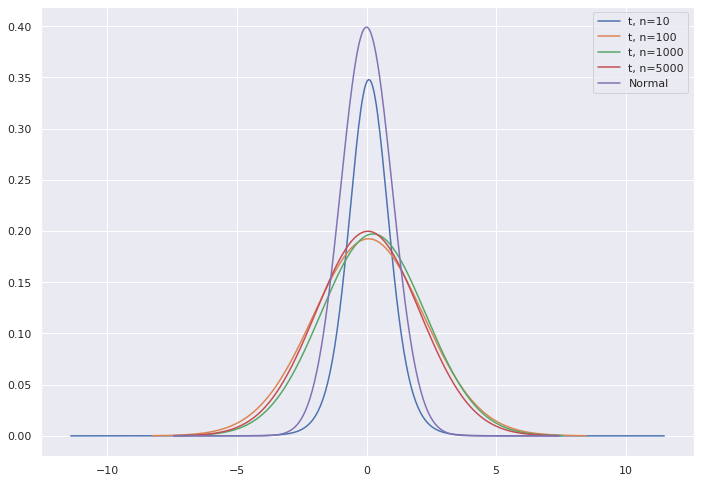

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

# 10, 100, 1000 and 5000, respectively
def make_t_distribution(sample_size, mean, sd):
    t_sample = stats.t.rvs(sample_size - 1, mean, sd, sample_size) # Random t-distribution sample
    sample_mean = np.mean(t_sample) # sample mean
    sample_std = np.std(t_sample) # sample standard deviation
    t_dist = stats.t(df = sample_size - 1, loc = sample_mean, scale = sample_std) # make a t-distribution based on the sample
    x_axis = np.linspace(t_dist.ppf(0.0001), t_dist.ppf(0.9999), 500) # Generate an x-axis based on t-quantile values
    
    return t_dist, x_axis
def make_prob_plot():

    fig = plt.figure()
    fig.show()
    ax = fig.add_subplot(111)
    
    sample_norm = stats.norm()
    for i in [10, 100, 1000, 5000]:
        ax.plot(make_t_distribution(i, 0, 2)[1], make_t_distribution(i, 0, 2)[0].pdf(make_t_distribution(i, 0, 2)[1]), label=f't, n={i}')
        
    ax.plot(make_t_distribution(100000, 0, 2)[1], sample_norm.pdf(make_t_distribution(100000, 0, 2)[1]), label='Normal')

    plt.legend()

make_prob_plot()

## Question 2 Grade Distribution Comparison (40%)

Now you have impressed the management team, you have been given a sample data file `assets/class_grades.csv` for a number of courses, and you have been asked to consider the letter grades for STATS 250, DATASCI 306, MATH 217, ENGLISH 125, ECON 101, EECS 545 for the past records since 2015. The student grades are stored in 6 columns: 
* `STATS250_grade` stores the letter grades for those who took the STATS 250 course
* `DATASCI306_grade` stores the letter grades for those who took the DATASCI 306 course
* `MATH217_grade` stores the letter grades for those who took the MATH 217 course
* `ENGLISH125_grade` stores the letter grades for those who took the ENGLISH 125 course
* `ECON101_grade` stores the letter grades for those who took the ECON 101 course
* `EECS545_grade` stores the letter grades for those who took the EECS 545 course

Prior to drawing plots for student grade distribution, it's useful to compute the total student enrollments for each course (of course, you need to ignore NAN values) and convert student's letter grades into standard grade points. Here's a nice table on the grade point systems available at the umich website:

| Letter Grade | Grade Point |
|:---: |:----:|
| A+ | 4.3 |
| A | 4.0 |
| A- | 3.7 |
| B+ | 3.3 |
| B | 3 |
| B- | 2.7 |
| C+ | 2.3 |
| C | 2 |
| C- | 1.7 |
| D+ | 1.3 |
| D | 1 |
| D- | 0.7 |
| E | 0 |

You are asked to:
* Make a **3 * 2** figure (so 6 subplots) such that for each course you have a **histogram** using the student grade samples respectively
* Remove the gaps between the bars in the histograms if any
* For each probability plot, you should overlay a normal distribution with the same mean and standard deviation parameters as you see in the samples (you can calculate this!)
* You should of course use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis

Hints:
* To make subplots, one good way to start with is to use `fig, ax = plt.subplot()`
* To remove the gaps that might show up in histograms, you can customize the `bins` parameter
* If you want to make histograms using the distplot function in seaborn package, you need to specify the parameters `kde = False` and `norm_hist = True`

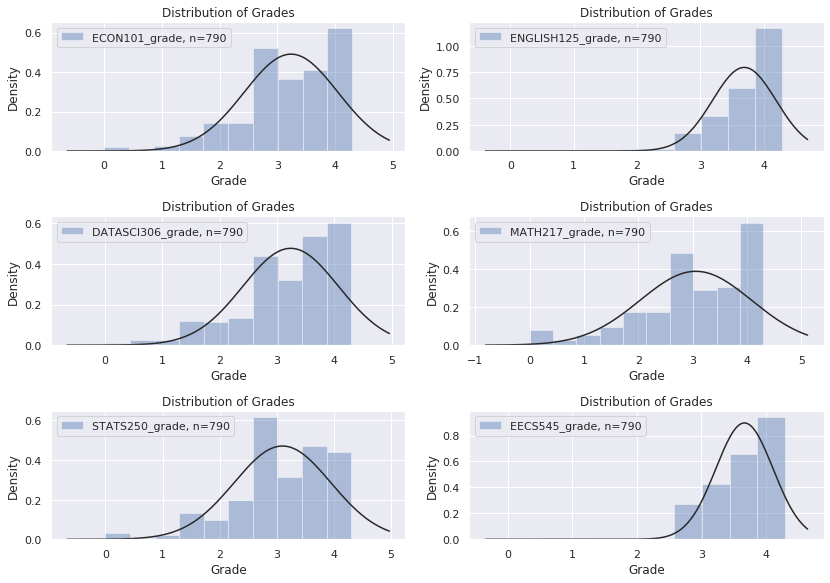

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def grade_convert(x):
    if x == 'A+':
        x = 4.3
    elif x == 'A':
        x = 4.0
    elif x == 'A-':
        x = 3.7
    elif x == 'B+':
        x = 3.3
    elif x == 'B':
        x = 3
    elif x == 'B-':
        x = 2.7
    elif x == 'C+':
        x = 2.3
    elif x == 'C':
        x = 2
    elif x == 'C-':
        x = 1.7
    elif x == 'D+':
        x = 1.3
    elif x == 'D':
        x = 1
    elif x == 'D-':
        x = 0.7
    elif x == 'E':
        x = 0
    else:
        pass
    return x

df = pd.read_csv('assets/class_grades.csv')
df = df.dropna()

for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x: grade_convert(x))

def grade_distribution():
    fig, axes = plt.subplots(3, 2)
    axes = axes.ravel()
    for index, ax in enumerate(axes):
        sns.distplot(df.iloc[:, index+1], fit=stats.norm, kde=False, bins=10,
                ax=ax, label=f"{df.iloc[:, index+1].name}, n={len(df.iloc[:, index+1])}")

        ax.set_xlabel('Grade')
        ax.set_ylabel('Density')
        ax.set_title('Distribution of Grades')
        ax.legend()
    fig.tight_layout()

grade_distribution()


# Question 3 Grade Distribution Normality Check (30%)

Seeing the student grade distributions of the 6 large residential courses, the team team is tempted to draft recommendations for instructors and report to them what particular aspects could be addressed to improve students' academic learning outcome. However, before they launch statistical tests, they need to verify if the student grades data approximately follows normal distribution, a sufficient condition rendering the design of statistical models valid for those courses. You suggest that a QQ-plot is a great method to determine how similar a distribution is to another. Great idea!
* Make a 3 * 2 figure (again, 6 subplots) so that for each course you have a QQ plot using the student grade samples versus the normal distribution with the same mean and standard deviation
* You need to use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* For each QQ-plot, use annotate tool inside the graph to circle observations which are 2 standard deviations outside from the QQ-line (a straight line showing the theoretical values for different quantiles under normal distribution)
* Write a couple of sentence about the figure discussing the courses and whether they seem to be normally distributed.

Hint: You may find using `fig = plt.figure()` and `fig.add_subplot()` functions helpful to create subplots. You don't have to use these functions though.

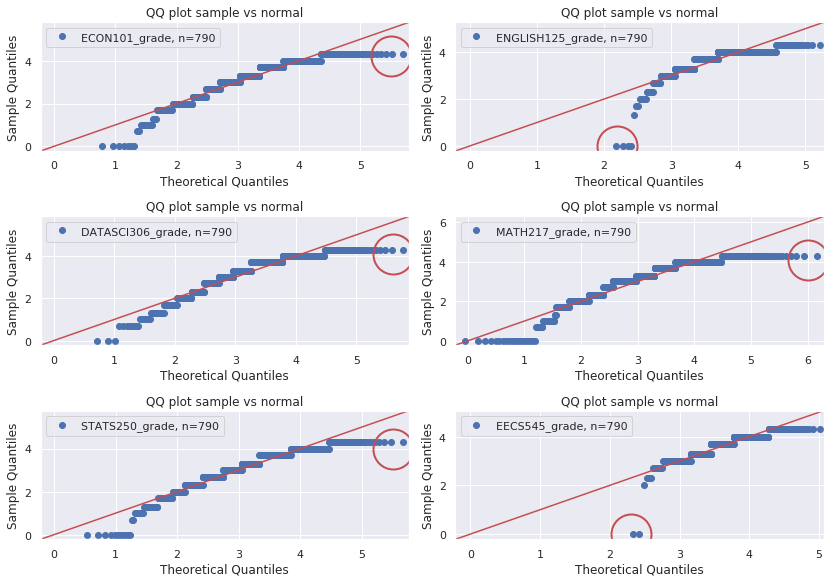

In [3]:
def grade_normality():
    
    import statsmodels.api as sm

    fig, axes = plt.subplots(3, 2)
    axes = axes.ravel()
    
    for index, ax in enumerate(axes):
        sm.qqplot(df.iloc[:, index+1], stats.norm, loc=np.mean(df.iloc[:, index+1]), scale=np.std(df.iloc[:, index+1]), line='45', ax=ax,
                 label=f"{df.iloc[:, index+1].name}, n={len(df.iloc[:, 1])}")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Sample Quantiles')
        ax.set_title('QQ plot sample vs normal')
        ax.legend()

    fig.tight_layout()
    all_axes = fig.get_axes()
    
    circle_rad = 20
    
    all_axes[0].plot(5.5, 4.2, 'o', ms=circle_rad * 2, mec='r', mfc='none', mew=2, color='r')
    all_axes[1].plot(2.2, 0.0, 'o', ms=circle_rad * 2, mec='r', mfc='none', mew=2, color='r')
    all_axes[2].plot(5.6, 4.1, 'o', ms=circle_rad * 2, mec='r', mfc='none', mew=2, color='r')
    all_axes[3].plot(6.0, 4.1, 'o', ms=circle_rad * 2, mec='r', mfc='none', mew=2, color='r')
    all_axes[4].plot(5.5, 4, 'o', ms=circle_rad * 2, mec='r', mfc='none', mew=2, color='r')
    all_axes[5].plot(2.3, 0, 'o', ms=circle_rad * 2, mec='r', mfc='none', mew=2, color='r')
    
grade_normality()

- The 6 plots above analyze the distribution of grades in comparison to a normal distribution
    - For each class, if the distribution of our classes was normal, the data points would be on the 45 degree angle line.
- The most normally distributed classes are DATASCI306, MATH127, ECON101, and STAS250.
- The least normally distributed classes are EECS545 and ENGLISH125. 
- I have annoted where the largest differences between the class grade distribution and a normal distribution appear.